In [1]:
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
from astropy.io import fits
from scipy.stats import mode as spmode
from astropy.stats import sigma_clip

In [2]:
biases = glob('/Users/tacodragon/AST376/Project_0/Project_0/Bias/WrinklyFlats-*.fit')
print(len(biases))
#making sure things work

16


In [3]:
fits.getheader(biases[0])
#header is useful

SIMPLE  =                    T                                                  
BITPIX  =                   16 /8 unsigned int, 16 & 32 int, -32 & -64 real     
NAXIS   =                    2 /number of axes                                  
NAXIS1  =                 1024 /fastest changing axis                           
NAXIS2  =                 1024 /next to fastest changing axis                   
BSCALE  =   1.0000000000000000 /physical = BZERO + BSCALE*array_value           
BZERO   =   32768.000000000000 /physical = BZERO + BSCALE*array_value           
DATE-OBS= '2020-02-08T01:24:41' /YYYY-MM-DDThh:mm:ss observation start, UT      
EXPTIME =  0.00000000000000000 /Exposure time in seconds                        
EXPOSURE=  0.00000000000000000 /Exposure time in seconds                        
SET-TEMP=  -20.000000000000000 /CCD temperature setpoint in C                   
CCD-TEMP=  -20.187500000000000 /CCD temperature at start of exposure in C       
XPIXSZ  =   24.0000000000000

In [75]:
def display(data):
    plt.imshow(data, cmap = 'viridis')
    plt.colorbar()
    plt.show()
    
    
bias_data = fits.getdata(biases[0])

def mode(a):
    return spmode(a.flatten())[0][0]



#define some useful functions for later

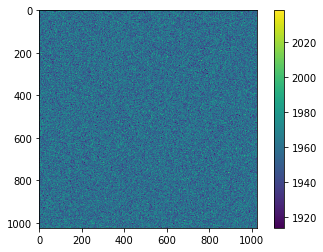

In [5]:
display(bias_data)
#it works!

In [6]:
# Here is where the fun starts: bias edition

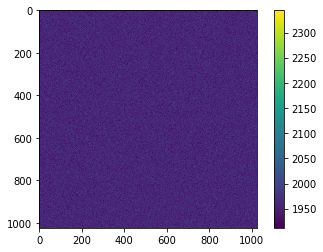

In [7]:
bias_stack = np.zeros((16,1024,1024))

for i,file in enumerate(biases):
    bias_stack[i] = fits.getdata(file)
    
display(bias_stack[15])


#making the stack of bias frames

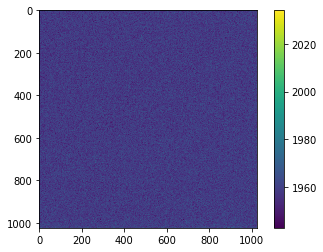

Min: 1943.0
Max: 2034.0
Median: 1958.5
Mean: 1958.7184915542603
Stdev: 2.867378081755752


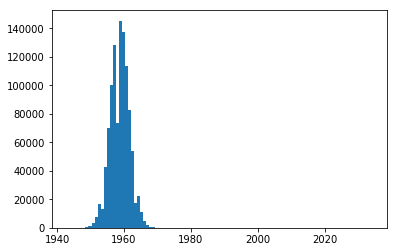

In [67]:
master_bias = np.median(bias_stack,axis=0)
display(master_bias)


print('Min:', np.min(master_bias))
print('Max:', np.max(master_bias))
print('Median:', np.median(master_bias))
print('Mean:', np.mean(master_bias))
print('Stdev:', np.std(master_bias))
bias_hist = plt.hist(master_bias.flatten(),100)
plt.savefig('Feldner_bias_hist.png')

#master frame is the median of the stack, with some statistics after

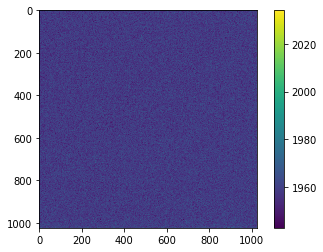

In [78]:
plt.imshow(master_bias, cmap = 'viridis')
plt.colorbar()
plt.savefig('Feldner_master_bias.png')

In [9]:
#dark time

In [10]:
def darkdisplay(data):
    plt.imshow(data, cmap = 'viridis', vmin = np.percentile(data,5), vmax = np.percentile(data,95))
    plt.colorbar()
    plt.show()
    
#new function defined for displaying flats, since display don't work

29
7


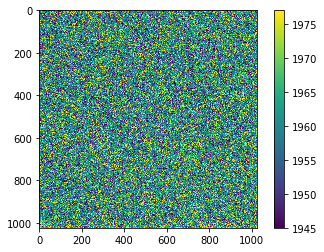

In [11]:
darks = glob('/Users/tacodragon/AST376/Project_0/Project_0/darks/Wrinkly*.fit')
darks_5s = glob('/Users/tacodragon/AST376/Project_0/Project_0/darks/Wrinkly*_5s.fit')
darks_15s = glob('/Users/tacodragon/AST376/Project_0/Project_0/darks/Wrinkly*_15s.fit')
darks_25s = glob('/Users/tacodragon/AST376/Project_0/Project_0/darks/Wrinkly*_25s.fit')
darks_35s = glob('/Users/tacodragon/AST376/Project_0/Project_0/darks/Wrinkly*_35s.fit')
print(len(darks))
print(len(darks_15s))
#dark_data_1 = fits.getdata(darks[3])
#display(dark_data_1)
dark_15s_data_1 = fits.getdata(darks_15s[1])
darkdisplay(dark_15s_data_1)

#importing darks by time

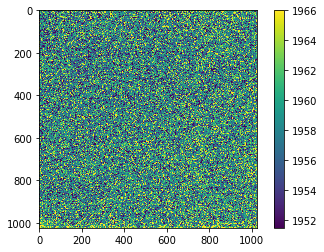

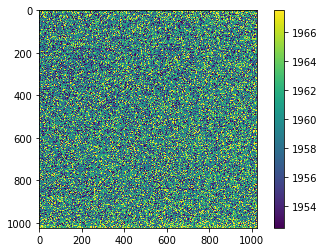

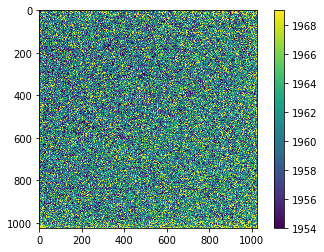

In [12]:
darks_5s_stack = np.zeros((9,1024,1024))

for i,file in enumerate(darks_5s):
    darks_5s_stack[i] = fits.getdata(file)
    
darks_15s_stack = np.zeros((8,1024,1024))

for i,file in enumerate(darks_15s):
    darks_15s_stack[i] = fits.getdata(file)
    
darks_25s_stack = np.zeros((8,1024,1024))

for i,file in enumerate(darks_25s):
    darks_25s_stack[i] = fits.getdata(file)

    
darks_35s_stack = np.zeros((8,1024,1024))

for i,file in enumerate(darks_35s):
    darks_35s_stack[i] = fits.getdata(file)
    
master_dark_5s = np.median(darks_5s_stack,axis=0)
master_dark_15s = np.median(darks_15s_stack,axis=0)
master_dark_25s = np.median(darks_25s_stack,axis=0)
master_dark_35s = np.median(darks_35s_stack,axis=0)



darkdisplay(master_dark_15s)
darkdisplay(master_dark_25s)
darkdisplay(master_dark_35s)

#making stacks and medianing the darks

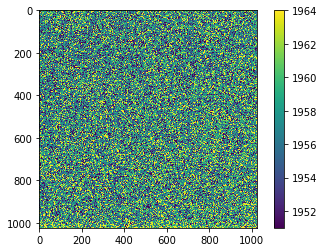

Min: 1936.0
Max: 6606.0
Median: 1957.0
Mean: 1957.4883308410645
Stdev: 11.453543879039334


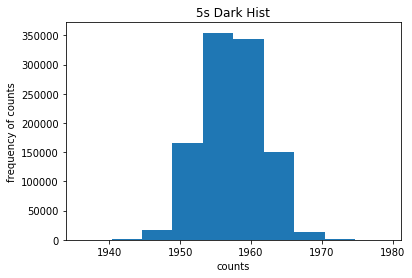

In [55]:
darkdisplay(master_dark_5s)
print('Min:', np.min(master_dark_5s))
print('Max:', np.max(master_dark_5s))
print('Median:', np.median(master_dark_5s))
print('Mean:', np.mean(master_dark_5s))
print('Stdev:', np.std(master_dark_5s))

sigma5s = sigma_clip(master_dark_5s, sigma=2, maxiters = 1)
#dark_5s_hist = plt.hist(master_dark_5s.flatten(),100)
sigma5s_hist = plt.hist(sigma5s.flatten(),10)
plt.xlabel('counts')
plt.ylabel('frequency of counts')
plt.title('5s Dark Hist')
plt.savefig('Feldner_5s_Dark_hist.png')

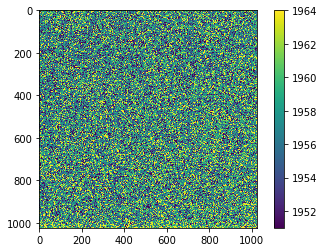

In [81]:
plt.imshow(master_dark_5s, cmap = 'viridis', vmin = np.percentile(master_dark_5s,5), vmax = np.percentile(master_dark_5s,95))
plt.colorbar()
plt.savefig('Feldner_master_dark_5s.png')

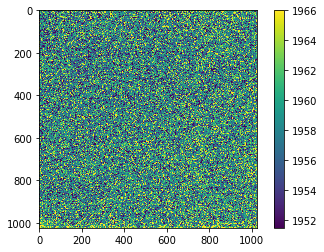

Min: 1935.5
Max: 15749.0
Median: 1958.5
Mean: 1958.9642100334167
Stdev: 32.3168512378046


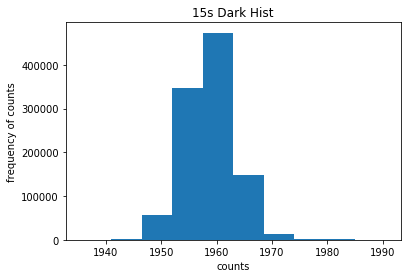

In [57]:
darkdisplay(master_dark_15s)
print('Min:', np.min(master_dark_15s))
print('Max:', np.max(master_dark_15s))
print('Median:', np.median(master_dark_15s))
print('Mean:', np.mean(master_dark_15s))
print('Stdev:', np.std(master_dark_15s))

sigma15s = sigma_clip(master_dark_15s, sigma=1, maxiters = 1)

sigma15s_hist = plt.hist(sigma15s.flatten(),10)
#dark_15s_hist = plt.hist(master_dark_15s.flatten(),100)
plt.xlabel('counts')
plt.ylabel('frequency of counts')
plt.title('15s Dark Hist')
plt.savefig('Feldner_15s_Dark_hist.png')

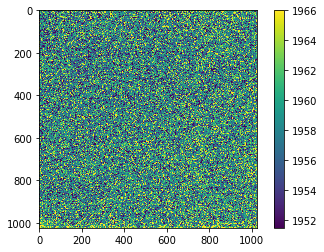

In [82]:
plt.imshow(master_dark_15s, cmap = 'viridis', vmin = np.percentile(master_dark_15s,5), vmax = np.percentile(master_dark_15s,95))
plt.colorbar()
plt.savefig('Feldner_master_dark_15s.png')

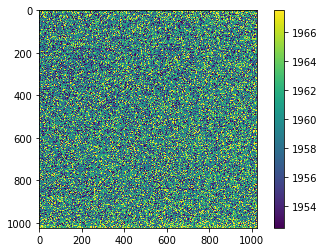

Min: 1938.0
Max: 25043.5
Median: 1959.5
Mean: 1960.563799381256
Stdev: 53.2941572170605


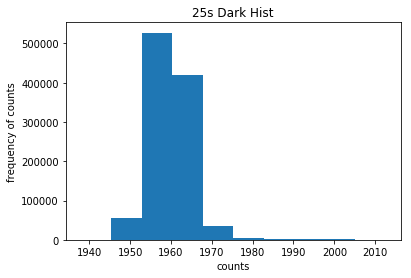

In [60]:
darkdisplay(master_dark_25s)
print('Min:', np.min(master_dark_25s))
print('Max:', np.max(master_dark_25s))
print('Median:', np.median(master_dark_25s))
print('Mean:', np.mean(master_dark_25s))
print('Stdev:', np.std(master_dark_25s))

sigma25s = sigma_clip(master_dark_25s, sigma=1, maxiters = 1)

sigma25s_hist = plt.hist(sigma25s.flatten(),10)
plt.xlabel('counts')
plt.ylabel('frequency of counts')
plt.title('25s Dark Hist')
plt.savefig('Feldner_25s_Dark_hist.png')

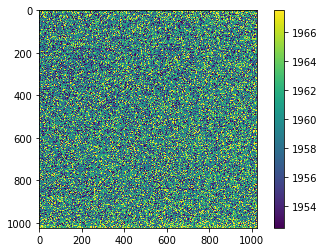

In [83]:
plt.imshow(master_dark_25s, cmap = 'viridis', vmin = np.percentile(master_dark_25s,5), vmax = np.percentile(master_dark_25s,95))
plt.colorbar()
plt.savefig('Feldner_master_dark_25s.png')

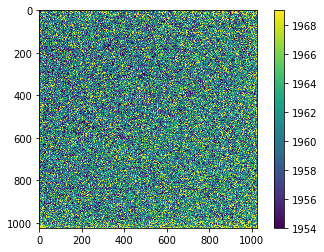

Min: 1937.5
Max: 34374.5
Median: 1961.0
Mean: 1962.413953781128
Stdev: 73.98143157997201


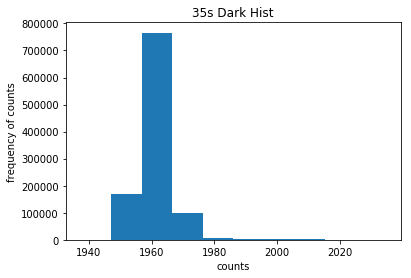

In [62]:
darkdisplay(master_dark_35s)
print('Min:', np.min(master_dark_35s))
print('Max:', np.max(master_dark_35s))
print('Median:', np.median(master_dark_35s))
print('Mean:', np.mean(master_dark_35s))
print('Stdev:', np.std(master_dark_35s))

sigma35s = sigma_clip(master_dark_35s, sigma=1, maxiters = 1)

sigma35s_hist = plt.hist(sigma35s.flatten(),10)

#dark35s_hist = plt.hist(master_dark_35s.flatten(),100)
plt.xlabel('counts')
plt.ylabel('frequency of counts')
plt.title('35s Dark Hist')
plt.savefig('Feldner_35s_Dark_hist.png')

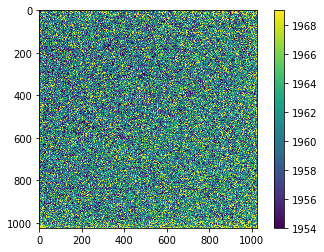

In [84]:
plt.imshow(master_dark_35s, cmap = 'viridis', vmin = np.percentile(master_dark_35s,5), vmax = np.percentile(master_dark_35s,95))
plt.colorbar()
plt.savefig('Feldner_master_dark_35s.png')

0.16376458168029784


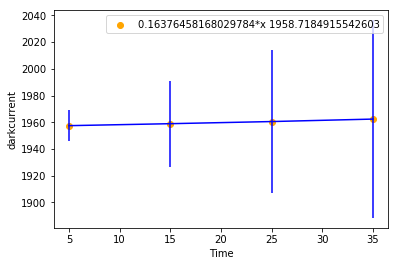

In [90]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
from scipy.stats import linregress

darkcurrent = np.array([np.mean(master_dark_5s), np.mean(master_dark_15s), np.mean(master_dark_25s), np.mean(master_dark_35s)])
time = np.array([5, 15, 25, 35])
bias_mean = np.mean(master_bias)
error = [np.std(master_dark_5s),np.std(master_dark_15s), np.std(master_dark_25s), np.std(master_dark_35s)]

timereshape = time.reshape(-1,1)

model.fit(timereshape,darkcurrent)

slope = linregress(time,darkcurrent)
print(slope[0])

plt.scatter(time,darkcurrent, color = 'orange', marker = 'o', label = str(slope[0])+'*x '+str(bias_mean))
plt.errorbar(time,darkcurrent,error, color = 'blue')
plt.xlabel('Time')
plt.ylabel('darkcurrent')
plt.legend()
plt.savefig('Feldner_linreg.png')
plt.show()


1956.5822818756103


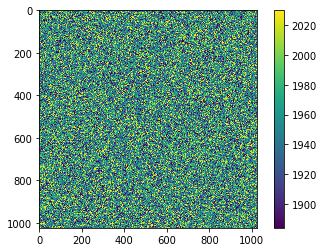

In [18]:
dark_10s = np.max(slope*10)
print(dark_10s)
dark_10simage = np.random.poisson(dark_10s, size = (1024,1024))
darkdisplay(dark_10simage)

#this exists only as extrapolation for making the master flat

In [19]:
#flats

In [20]:
flats = glob('/Users/tacodragon/AST376/Project_0/Project_0/Flats/Copy*.fit')
flats_R = glob('/Users/tacodragon/AST376/Project_0/Project_0/Flats/Copy*_R*.fit')
flats_B = glob('/Users/tacodragon/AST376/Project_0/Project_0/Flats/Copy*_B*.fit')
flats_V = glob('/Users/tacodragon/AST376/Project_0/Project_0/Flats/Copy*_V*.fit')
print(len(flats_R))
print(len(flats))
fits.getheader(flats[0])

#importing flats

5
15


SIMPLE  =                    T                                                  
BITPIX  =                   16 /8 unsigned int, 16 & 32 int, -32 & -64 real     
NAXIS   =                    2 /number of axes                                  
NAXIS1  =                 1024 /fastest changing axis                           
NAXIS2  =                 1024 /next to fastest changing axis                   
BSCALE  =   1.0000000000000000 /physical = BZERO + BSCALE*array_value           
BZERO   =   32768.000000000000 /physical = BZERO + BSCALE*array_value           
DATE-OBS= '2020-02-06T00:55:06' /YYYY-MM-DDThh:mm:ss observation start, UT      
EXPTIME =   10.000000000000000 /Exposure time in seconds                        
EXPOSURE=   10.000000000000000 /Exposure time in seconds                        
SET-TEMP=  -20.000000000000000 /CCD temperature setpoint in C                   
CCD-TEMP=  -20.125000000000000 /CCD temperature at start of exposure in C       
XPIXSZ  =   24.0000000000000

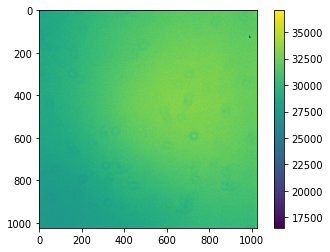

In [21]:
flat_data_1 = fits.getdata(flats[0])
display(flat_data_1)

#looking at the first one

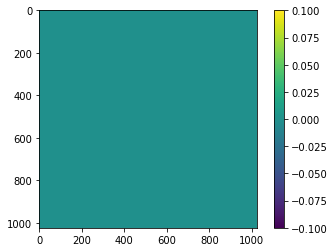

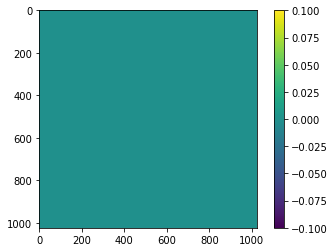

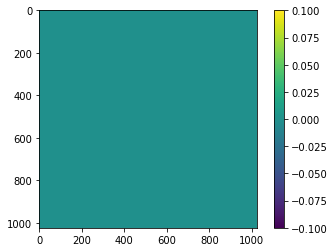

In [25]:
flat_stack_R = np.zeros((6,1024,1024))

for i,file in enumerate(flats_R):
    #R_data = fits.getdata(file)
    #darksubR = R_data - dark_10simage
    #dsn = darksubR/mode(darksubR)
    #flat_stack_R[i] = dsn
    flat_stack_R[i] = fits.getdata(file)

display(flat_stack_R[5])

flat_stack_B = np.zeros((6,1024,1024))

for i,file in enumerate(flats_B):
    #B_data = fits.getdata(file)
    #darksubB = B_data - dark_10simage
    #dsn = darksubB/mode(darksubB)
    #flat_stack_B[i] = dsn
    flat_stack_B[i] = fits.getdata(file)
    

display(flat_stack_B[5])

flat_stack_V = np.zeros((6,1024,1024))

for i,file in enumerate(flats_V):
    #V_data = fits.getdata(file)
    #darksubV = V_data - dark_10simage
    #dsn = darksubV/mode(darksubV)
    #flat_stack_V[i] = dsn
    flat_stack_V[i] = fits.getdata(file)

display(flat_stack_V[5])

#making stacks of flats by filter

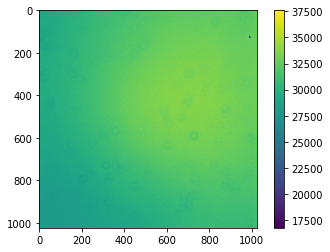

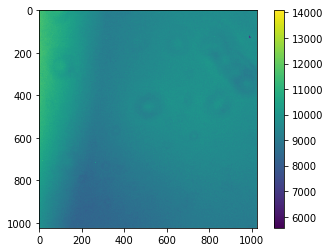

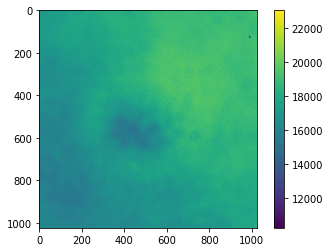

In [26]:
flat_stack_R = flat_stack_R
flat_stack_B = flat_stack_B
flat_stack_V = flat_stack_V

master_flat_R = np.median(flat_stack_R,axis=0)
master_flat_B = np.median(flat_stack_B,axis=0)
master_flat_V = np.median(flat_stack_V,axis=0)



display(master_flat_R)
display(master_flat_B)
display(master_flat_V)

#master flats are by median according to filter

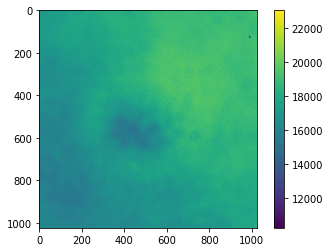

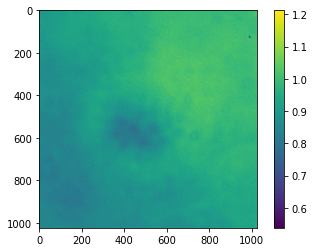

Min: 10239.5
Max: 23047.0
Median: 17690.5
Mean: 17671.37615442276
Stdev: 1127.4780886402887


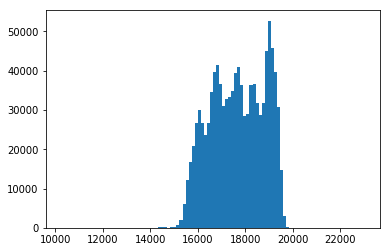

In [27]:
master_flat_list = [master_flat_R,master_flat_B,master_flat_V]

master_flat = np.median(master_flat_list, axis=0)

flatframe = master_flat/mode(master_flat)

display(master_flat)
display(flatframe)

print('Min:', np.min(master_flat))
print('Max:', np.max(master_flat))
print('Median:', np.median(master_flat))
print('Mean:', np.mean(master_flat))
print('Stdev:', np.std(master_flat))
flat_hist = plt.hist(master_flat.flatten(),100)


#smoosh the master filtered flats into one, and statistics/

Normalized Mean: 0.9296320771436035


Text(0,0.5,'frequency (of counts)')

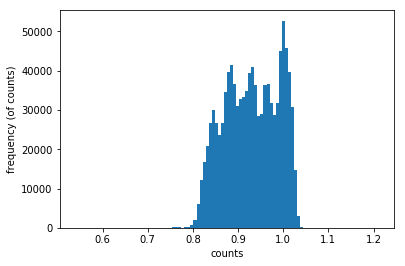

In [50]:
print('Normalized Mean:', np.mean(flatframe))
flatframe_hist = plt.hist(flatframe.flatten(),100)
plt.xlabel('counts, normalized-flat frame')
plt.ylabel('frequency (of counts)')

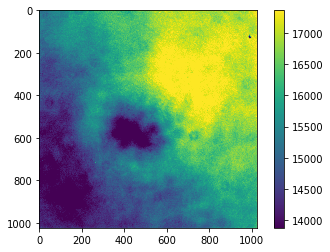

In [32]:
darksubflat = master_flat - dark_10simage
darkdisplay(darksubflat)

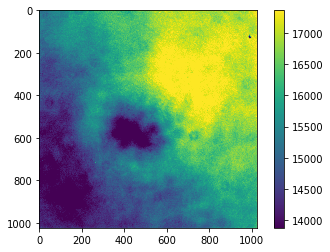

In [87]:
plt.imshow(darksubflat, cmap = 'viridis', vmin = np.percentile(darksubflat,5), vmax = np.percentile(darksubflat,95))
plt.colorbar()
plt.savefig('Feldner_master_flat.png')

Normalized Mean: 15714.830529689789


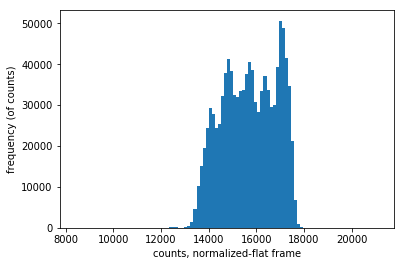

In [52]:
print('Normalized Mean:', np.mean(darksubflat))
darksub_hist = plt.hist(darksubflat.flatten(),100)
plt.xlabel('counts, normalized-flat frame')
plt.ylabel('frequency (of counts)')
plt.savefig('Feldner_flat_hist.png')

In [31]:
#time to write files

In [74]:
#bias
#fits.writeto('Feldner_master_bias.fits', master_bias)


#flat
#fits.writeto('Feldner_master_flat.fits',darksubflat)

#darks
#5s
#fits.writeto('Feldner_master_dark_5s.fits',master_dark_5s)
#15s
#fits.writeto('Feldner_master_dark_15s.fits',master_dark_15s)
#25s
#fits.writeto('Feldner_master_dark_25s.fits',master_dark_25s)
#35s
#fits.writeto('Feldner_master_dark_35s.fits',master_dark_35s)

#this has happened so i don't want to run it again